# Federal University of Ceará
# Teleinformatics Departament
# Graduate Program in Teleinformatics Engeneering
## TIP8419 - Tensor Algebra
## Homework 10 - Tensor Kronecker Product Singular Value Decomposition (TKPSVD)
### Report and Simulation results

- Ezequias Márcio - 497779

To run this notebook properly, it is necessary Python3 installed alongside with the packages listed below:

- `numpy 1.17.2`
- `matplotlib 3.2.1`

Make sure that the file `tensoralg.py` is in the same directory as this notebook. In this file, it can be found the tensor algebra module functions.

In [1]:
# Importing the simulation module:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from tensoralg import *
np.set_printoptions(4, linewidth=175)

### Problem 1

Consider the Nth-order tensor $\mathbf{\mathcal{X}} \in \mathbb{R}^{I_1 \times I_2 \times \dots I_N}$. Then, $\mathbf{\mathcal{X}} = \sum\limits_{j=1}^{R} \sigma_j \mathbf{\mathcal{A}}_{j}^{(d)}\otimes\mathbf{\mathcal{A}}_{j}^{(d-1)} \otimes ... \otimes \mathbf{\mathcal{A}}_{j}^{(1)}$ is the TKPSVD of tensor $\mathbf{\mathcal{X}}$, where the tensors $\mathbf{\mathcal{A}}_{j}^{(i)} \in \mathbb{R}^{n_1 \times n_2 \times \dots n_N}$ satisfy

\begin{equation}
\Vert \mathbf{\mathcal{A}}_{j}^{(i)}  \Vert_F = 1, \;\;\; \prod\limits_{i=1}^{d} n_k = I_k, \; 1 \leq k \leq N
\end{equation}

For $d=5$, $N=3$ and $I_n$ arbitrary implement the TKPSVD for that estimate 
$\mathbf{\mathcal{A}}_{j}^{(1)}, \mathbf{\mathcal{A}}_{j}^{(2)},\mathbf{\mathcal{A}}_{j}^{(3)}, \mathbf{\mathcal{A}}_{j}^{(4)}$ and $\mathbf{\mathcal{A}}_{j}^{(5)}$, $1 \leq j \leq R$
What can you conclude? Explain the results.

### Solution:

Using the function implemented in `tensoralg.py` where

$\sigma_j = \prod\limits_{d=1}^{D}\Vert a^{(d)}_j \Vert$ from the PARAFAC decomposition.

In [2]:
tensor = np.random.rand(32, 32, 32)
shapes = [[2,2,2],[2,2,2],[2,2,2],[2,2,2],[2,2,2]]
sigmas, factors = tkpsvd(tensor, shapes)

In [3]:
y = np.power(sigmas, 1)
tensor_norm(tkp_tensor(y, factors)[1] - tensor)/tensor_norm(tensor)

0.4979366263100024

In [62]:
tensor = np.random.rand(32, 32, 32)
shapes = [[4,4,4],[2,2,2],[2,2,2],[2,2,2]]
sigmas, factors = tkpsvd(tensor, shapes)

In [64]:
y = np.power(sigmas, 1)
tensor_norm(tkp_tensor(y, factors)[1] - tensor)/tensor_norm(tensor)

0.4974818427770669

In [68]:
tensor = np.random.rand(32, 32, 32)
shapes = [[8,8,8],[2,2,2],[2,2,2]]
sigmas, factors = tkpsvd(tensor, shapes)

In [66]:
y = np.power(sigmas, 1)
tensor_norm(tkp_tensor(y, factors)[1] - tensor)/tensor_norm(tensor)

0.4910004653891644

A graphical example:

In [33]:
data = image.imread('tests/64test.jpg'); data.shape

(512, 512, 3)

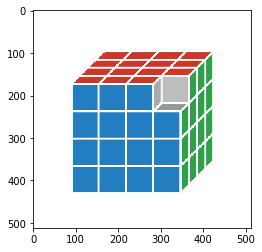

In [11]:
plt.imshow(data)

(<matplotlib.image.AxesImage at 0x7f8fd2c3e6d0>, (128, 128, 3))

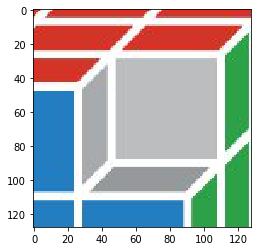

In [31]:
zoom = data[128:256,256:384,:]
plt.imshow(zoom), zoom.shape

In [34]:
target = zoom.transpose(math2npy(np.arange(data.ndim)))
dims = [[16, 16, 3], [4, 4, 1], [2, 2, 1]]; np.prod(dims, axis=0)

array([128, 128,   3])

In [71]:
s, f = tkpsvd(target, dims)

In [72]:
s

array([112648.9424,  83068.9306])

In [89]:
y = np.power(s, 1/2)

In [90]:
rec = tkp_tensor(y, f)[1].transpose(1,2,0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


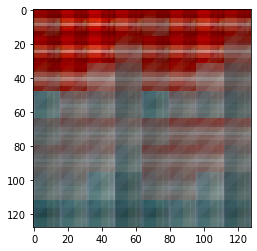

In [91]:
plt.imshow(rec)

### Problem 2

Consider the $4000 × 6000 × 3$ tensor $\mathbf{\mathcal{X}}$ . Compute the degree-$5$ TKPSVD of $\mathbf{\mathcal{X}}$
of the following form

$$\big( \mathbf{\mathcal{Â}}_{j}^{(1)}, \mathbf{\mathcal{Â}}_{j}^{(2)}, · · · , \mathbf{\mathcal{Â}}_{j}^{(5)}\big) = 
\underset{\mathbf{\mathcal{Â}}_{j}^{(1)}, \mathbf{\mathcal{Â}}_{j}^{(2)}, · · · , \mathbf{\mathcal{Â}}_{j}^{(5)}}{\text{min}} \Vert \mathbf{\mathcal{X}} - \mathbf{\mathcal{Â}}_{j}^{(5)}\otimes \mathbf{\mathcal{Â}}_{j}^{(4)}\otimes · · · \otimes \mathbf{\mathcal{Â}}_{j}^{(1)} \Vert_{F}^{2}
$$

with dimensions

\begin{equation}
(250 × 375 × 3) ⊗ (2 × 2 × 1) ⊗ (2 × 2 × 1) ⊗ (2 × 2 × 1) ⊗ (2 × 2 × 1)
\end{equation}

using your TKPSVD prototype function.

### Solution:



(<matplotlib.image.AxesImage at 0x7f8fd1df49d0>, (256, 256, 3))

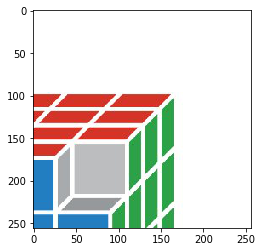

In [99]:
zoom = data[0:256,256:512,:]
plt.imshow(zoom), zoom.shape

In [111]:
dims = [[8, 8, 3],[4, 4, 1],[2, 2, 1], [2, 2, 1], [2, 2, 1]]; np.prod(dims, axis=0)
target = zoom.transpose(math2npy(np.arange(data.ndim)))

In [112]:
s, f = tkpsvd(target, dims)

In [128]:
for selectj in range(len(dims)-1):

    unpack = [[f[d][j] for d in range(len(dims))] for j in range(len(dims)-1)]

    shapes = np.array([unpack[0][d].shape for d in range(len(dims))])

    sum_rank1_terms = np.zeros(shapes.prod(axis=0))
    sum_rank1_terms += s[j] * tensor_kron(*unpack[selectj][::-1])

    print(selectj, tensor_norm(target - sum_rank1_terms)**2)

0 841793084.1911072
1 24076000610.705563
2 25082303071.029926
3 20300598766.689533
